### Import Library

In [1]:
import pandas as pd
import numpy as np
import os

# string processing
import re
from keras.utils.np_utils import to_categorical
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection, metrics


### Import true label

In [2]:
# import the true label

df_merge_quality = pd.read_csv('data/US_patent_abstract_50000_2015_with_title_1_5y.csv')

In [3]:
df_merge_quality['Claim_length'] = df_merge_quality['claims_text'].str.split().str.len()

In [4]:
df_merge_quality.head()

,Unnamed: 0,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,...,breakthrough,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text,Claim_length
0,558310,US-8761039-B2,Adaptive generation of channel quality indicat...,20120904,Adaptive generation of channel quality indicat...,What is claimed is: \n \n 1. A user ...,US08761039,410849633,US08761039,2012,...,0,0.695102,0.894376,0.666667,2.0,0.376003,0.382909,1,Adaptive generation of channel quality indicat...,1968
1,898437,US-9265347-B2,A mechanism and method for assembling a base t...,20140129,Cam assembly utilizing 2 or more interconnecte...,I claim: \n \n 1. A mechanism for as...,US09265347,421272321,US09265347,2014,...,0,NaN,0.816609,0.188235,2.0,0.269591,0.297736,0,Cam assembly utilizing 2 or more interconnecte...,658
2,1059828,US-9499260-B2,An aircraft landing gear wheel is disclosed. A...,20141014,Aircraft landing gear wheel with integral gear...,We claim: \n \n 1. An aircraft landi...,US09499260,459193604,US09499260,2014,...,0,0.586420,0.632653,0.380952,2.0,0.323905,0.331917,1,Aircraft landing gear wheel with integral gear...,709
3,119949,US-8158424-B2,Previous methods for culturing primate pluripo...,20100405,Primate pluripotent stem cells cultured in med...,1. A method for culturing primate pluripotent ...,US08158424,329269529,US08158424,2010,...,0,0.264197,0.612755,0.214286,5.0,0.410151,0.417625,1,Primate pluripotent stem cells cultured in med...,1153
4,488132,US-9106513-B2,Unified Communication and Collaboration (UC&am...,20120323,Unified communication aware networks,What is claimed is: \n \n 1. A metho...,US09106513,410686774,US09106513,2012,...,0,0.699325,0.781910,0.090909,3.0,0.296802,0.305626,0,Unified communication aware networks. Unified ...,1578


In [5]:
df_test = df_merge_quality[45000:]

In [6]:
df_test.shape

(5000, 31)

In [7]:
y_test_true = df_merge_quality['quality_rank'][45000:].values
print(y_test_true.shape)
y_test_true[:10]

(5000,)


array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [8]:
temp_pred2 = []
with open("Final_test_result/4_models_ensemble_prediction.csv") as f1:
    for line in f1.readlines():
        temp_pred2.append(int(float(line)))
temp_pred2

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,


In [9]:
len(temp_pred2)

5000

In [10]:
# double-check the result aligned
print(metrics.classification_report(y_test_true, temp_pred2))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78      2996
           1       0.74      0.39      0.51      2004

    accuracy                           0.70      5000
   macro avg       0.71      0.65      0.64      5000
weighted avg       0.71      0.70      0.67      5000



In [11]:
df_test['Ensemble_prediction'] = temp_pred2
df_test

/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,...,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text,Claim_length,Ensemble_prediction
45000,636501,US-9755475-B2,The present invention relates to an electric d...,20121123,Electric drive device for motor vehicle with o...,The invention claimed is: \n \n 1. A...,US09755475,423604300,US09755475,2012,...,0.653889,0.930131,0.386207,5.0,0.393040,0.347597,1,Electric drive device for motor vehicle with o...,523,1
45001,160726,US-7984975-B2,A nozzle cell of a printhead is provided which...,20100224,Printhead nozzle cell having photoresist chamber,"1. A nozzle cell of a printhead, the unit cell...",US07984975,315964514,US07984975,2010,...,0.541667,0.264463,0.145455,5.0,0.168819,0.266034,0,Printhead nozzle cell having photoresist chamb...,141,0
45002,43847,US-8018925-B2,Systems and methods are described that provide...,20100728,System and method for multi-services packet ne...,1. A Long Term Evolution switch-router schedul...,US08018925,329005247,US08018925,2010,...,0.433762,0.536442,0.159420,5.0,0.233315,0.314057,0,System and method for multi-services packet ne...,864,0
45003,294671,US-8816190-B2,"In one aspect of the present invention, a phot...",20110418,Photovoltaic devices and method of making,The invention claimed is: \n \n 1. A...,US08816190,376347240,US08816190,2011,...,0.000000,0.400408,0.000000,7.0,0.152116,0.193268,0,Photovoltaic devices and method of making. In ...,385,0
45004,891483,US-9038694-B2,A sun shading apparatus includes a supporting ...,20130912,Sun shader apparatus,What is claimed is: \n \n 1. A metho...,US09038694,413896038,US09038694,2013,...,0.625000,0.804688,0.125000,2.0,0.287532,0.313387,0,Sun shader apparatus. A sun shading apparatus ...,1924,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,175577,US-8745608-B2,"A scheduler of a reconfigurable array, a metho...",20100201,"Scheduler of reconfigurable array, method of s...",What is claimed is: \n \n 1. A sched...,US08745608,318230558,US08745608,2010,...,0.153554,0.879693,0.349206,4.0,0.165703,0.201958,0,"Scheduler of reconfigurable array, method of s...",857,0
49996,828296,US-9102164-B2,A data processing apparatus determines a color...,20130905,"Data processing apparatus, data processing met...",What is claimed is: \n \n 1. An appa...,US09102164,413583822,US09102164,2013,...,0.513889,0.768935,0.196078,2.0,0.281970,0.310400,0,"Data processing apparatus, data processing met...",1116,0
49997,1031377,US-9207365-B2,"According to one embodiment, an imaging lens i...",20140815,Imaging lens and solid state imaging device,What is claimed is: \n \n 1. An imag...,US09207365,438132244,US09207365,2014,...,0.506651,0.796762,0.129870,1.0,0.336999,0.400449,1,Imaging lens and solid state imaging device. A...,1408,0
49998,942646,US-9535998-B2,Systems and methods for an information reposit...,20140324,Information repository search system,I claim: \n \n 1. A method comprisin...,US09535998,420403969,US09535998,2014,...,NaN,0.858850,0.550459,3.0,0.147154,0.200251,0,Information repository search system. Systems ...,1148,0


In [12]:
def tech_field_cat(subcat):
    if subcat <= 8:
        return 0 # for 1. Electrical engineering
    elif subcat <= 13:
        return 1 # for 2. Instruments
    elif subcat <= 24:
        return 2 # for 3. Chemistry
    elif subcat <= 32:
        return 3 # for 4. Mechanical Engineering
    else:
        return 4 # for 5. Other fields

In [13]:
df_test['tech_field_big_cat'] = df_test['tech_field'].apply(tech_field_cat)

/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_test['Claim_length'] = df_test['claims_text'].str.split().str.len()

/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_test['Match'] = df_test['quality_rank'] == df_test['Ensemble_prediction']
df_test

/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,...,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text,Claim_length,Ensemble_prediction,tech_field_big_cat,Match
45000,636501,US-9755475-B2,The present invention relates to an electric d...,20121123,Electric drive device for motor vehicle with o...,The invention claimed is: \n \n 1. A...,US09755475,423604300,US09755475,2012,...,0.386207,5.0,0.393040,0.347597,1,Electric drive device for motor vehicle with o...,523,1,0,True
45001,160726,US-7984975-B2,A nozzle cell of a printhead is provided which...,20100224,Printhead nozzle cell having photoresist chamber,"1. A nozzle cell of a printhead, the unit cell...",US07984975,315964514,US07984975,2010,...,0.145455,5.0,0.168819,0.266034,0,Printhead nozzle cell having photoresist chamb...,141,0,3,True
45002,43847,US-8018925-B2,Systems and methods are described that provide...,20100728,System and method for multi-services packet ne...,1. A Long Term Evolution switch-router schedul...,US08018925,329005247,US08018925,2010,...,0.159420,5.0,0.233315,0.314057,0,System and method for multi-services packet ne...,864,0,0,True
45003,294671,US-8816190-B2,"In one aspect of the present invention, a phot...",20110418,Photovoltaic devices and method of making,The invention claimed is: \n \n 1. A...,US08816190,376347240,US08816190,2011,...,0.000000,7.0,0.152116,0.193268,0,Photovoltaic devices and method of making. In ...,385,0,0,True
45004,891483,US-9038694-B2,A sun shading apparatus includes a supporting ...,20130912,Sun shader apparatus,What is claimed is: \n \n 1. A metho...,US09038694,413896038,US09038694,2013,...,0.125000,2.0,0.287532,0.313387,0,Sun shader apparatus. A sun shading apparatus ...,1924,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,175577,US-8745608-B2,"A scheduler of a reconfigurable array, a metho...",20100201,"Scheduler of reconfigurable array, method of s...",What is claimed is: \n \n 1. A sched...,US08745608,318230558,US08745608,2010,...,0.349206,4.0,0.165703,0.201958,0,"Scheduler of reconfigurable array, method of s...",857,0,0,True
49996,828296,US-9102164-B2,A data processing apparatus determines a color...,20130905,"Data processing apparatus, data processing met...",What is claimed is: \n \n 1. An appa...,US09102164,413583822,US09102164,2013,...,0.196078,2.0,0.281970,0.310400,0,"Data processing apparatus, data processing met...",1116,0,0,True
49997,1031377,US-9207365-B2,"According to one embodiment, an imaging lens i...",20140815,Imaging lens and solid state imaging device,What is claimed is: \n \n 1. An imag...,US09207365,438132244,US09207365,2014,...,0.129870,1.0,0.336999,0.400449,1,Imaging lens and solid state imaging device. A...,1408,0,1,False
49998,942646,US-9535998-B2,Systems and methods for an information reposit...,20140324,Information repository search system,I claim: \n \n 1. A method comprisin...,US09535998,420403969,US09535998,2014,...,0.550459,3.0,0.147154,0.200251,0,Information repository search system. Systems ...,1148,0,0,True


In [16]:
sum(df_test['Match'])

3492

In [17]:
3492/5000 # accuracy aligned with 0.70 above

0.6984

In [18]:
df_test['Claim_length'].describe()

count     5000.000000
mean      1056.422800
std        735.239902
min          9.000000
25%        616.750000
50%        919.000000
75%       1314.000000
max      15610.000000
Name: Claim_length, dtype: float64

In [19]:
df_test['quality_index_4'].describe()

count    5000.000000
mean        0.282226
std         0.125097
min         0.015298
25%         0.194429
50%         0.272865
75%         0.350080
max         0.916352
Name: quality_index_4, dtype: float64

In [20]:
table1 = pd.pivot_table(df_test, values = ['Match', 'publication_number'], index = ['tech_field_big_cat'], aggfunc = {'Match':['sum'], 'publication_number':[len]})
table1

,Match,publication_number
,sum,len
tech_field_big_cat,,
0,1758.0,2440
1,574.0,803
2,505.0,771
3,509.0,772
4,146.0,214


In [21]:
table2 = table1.join(pd.DataFrame(table1['Match']['sum'] / table1['publication_number']['len'],
                                 columns = pd.MultiIndex.from_product([['Correct Ratio'],['%']]),
                                 index = table1.index))
table2
# Although the tech 2 appearto have the lowest correct ratio, but it's not far off than other

,Match,publication_number,Correct Ratio
,sum,len,%
tech_field_big_cat,,,
0,1758.0,2440,0.720492
1,574.0,803,0.714819
2,505.0,771,0.654994
3,509.0,772,0.659326
4,146.0,214,0.682243


In [22]:
table1 = pd.pivot_table(df_test, values = ['Match', 'publication_number'], index = ['tech_field'], aggfunc = {'Match':['sum'], 'publication_number':[len]})
table1

,Match,publication_number
,sum,len
tech_field,,
1,275.0,398
2,197.0,258
3,138.0,203
4,295.0,397
5,52.0,74
6,523.0,725
7,34.0,48
8,244.0,337


In [23]:
table2 = table1.join(pd.DataFrame(table1['Match']['sum'] / table1['publication_number']['len'],
                                 columns = pd.MultiIndex.from_product([['Correct Ratio'],['%']]),
                                 index = table1.index))
table2
# Although the tech 2 appearto have the lowest correct ratio, but it's not far off than other

,Match,publication_number,Correct Ratio
,sum,len,%
tech_field,,,
1,275.0,398,0.690955
2,197.0,258,0.763566
3,138.0,203,0.679803
4,295.0,397,0.743073
5,52.0,74,0.702703
6,523.0,725,0.721379
7,34.0,48,0.708333
8,244.0,337,0.724036


In [24]:
table1 = pd.pivot_table(df_test, values = ['Match', 'publication_number'], index = ['filing'], aggfunc = {'Match':['sum'], 'publication_number':[len]})
table2 = table1.join(pd.DataFrame(table1['Match']['sum'] / table1['publication_number']['len'],
                                 columns = pd.MultiIndex.from_product([['Correct Ratio'],['%']]),
                                 index = table1.index))
table2
# again, years also don't have obvious difference

,Match,publication_number,Correct Ratio
,sum,len,%
filing,,,
2010,633.0,894,0.708054
2011,697.0,1021,0.682664
2012,705.0,1047,0.673352
2013,783.0,1080,0.725000
2014,673.0,957,0.703239
2015,1.0,1,1.000000


In [25]:
table1 = pd.pivot_table(df_test, values = ['Match', 'publication_number'], index = ['filing', 'tech_field_big_cat'], aggfunc = {'Match':['sum'], 'publication_number':[len]})
table2 = table1.join(pd.DataFrame(table1['Match']['sum'] / table1['publication_number']['len'],
                                 columns = pd.MultiIndex.from_product([['Correct Ratio'],['%']]),
                                 index = table1.index))
table2
# again, years also don't have obvious difference

Match publication_number Correct Ratio
                             sum                len             %
filing tech_field_big_cat                                        
2010   0                   311.0                409      0.760391
       1                   108.0                141      0.765957
       2                    92.0                156      0.589744
       3                    97.0                149      0.651007
       4                    25.0                 39      0.641026
2011   0                   379.0                520      0.728846
       1                    92.0                146      0.630137
       2                   109.0                167      0.652695
       3                    96.0                151      0.635762
       4                    21.0                 37      0.567568
2012   0                   353.0                512      0.689453
       1                   134.0                181      0.740331
       2                    97.0                164      0.591463
       3                    93.0                151      0.615894
       4                    28.0                 39      0.717949
2013   0                   398.0                543      0.732965
       1                   123.0                169      0.727811
       2                   113.0                164      0.689024
       3                   115.0                159      0.723270
       4                    34.0                 45      0.755556
2014   0                   317.0                456      0.695175
       1                   117.0                166      0.704819
       2                    94.0                120      0.783333
       3                   107.0                161      0.664596
       4                    38.0                 54      0.703704
2015   3                     1.0                  1      1.000000

In [26]:
df_test_sort = df_test.sort_values(by = 'quality_index_4', ignore_index = True)
df_test_sort

,Unnamed: 0,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,...,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text,Claim_length,Ensemble_prediction,tech_field_big_cat,Match
0,781887,US-9393278-B2,A herbal composition for wound healing is disc...,20130626,Method for wound healing,What is claimed is: \n \n 1. A metho...,US09393278,424975645,US09393278,2013,...,0.368421,3.0,0.015298,0.110128,0,Method for wound healing. A herbal composition...,107,0,2,True
1,949793,US-9926600-B2,Compositions and methods for the detection and...,20140414,Genetic alterations associated with type I dia...,The invention claimed is: \n \n 1. A...,US09926600,425724431,US09926600,2014,...,0.857143,4.0,0.015926,0.051929,0,Genetic alterations associated with type I dia...,372,0,2,True
2,39257,US-8499374-B2,A sealable cabinet that permits a human or ani...,20101123,Method and system for the therapeutic applicat...,I claim: \n \n 1. A system for the t...,US08499374,334317651,US08499374,2010,...,0.000000,7.0,0.024656,0.133218,0,Method and system for the therapeutic applicat...,386,0,1,True
3,740172,US-9113763-B2,An attachment for an upright vacuum cleaner wh...,20130423,Vacuum extension,What is claimed is: \n \n 1. A nozzl...,US09113763,411943693,US09113763,2013,...,0.076923,2.0,0.026166,0.125528,0,Vacuum extension. An attachment for an upright...,198,0,4,True
4,569892,US-8394358-B2,Methods for killing insects and a nest are dis...,20120912,"Wasp, hornet, and yellowjacket spray repellant...","1. An insecticidal composition, consisting ess...",US08394358,379406863,US08394358,2012,...,0.151515,4.0,0.032063,0.197074,0,"Wasp, hornet, and yellowjacket spray repellant...",79,0,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,222966,US-8100568-B2,A vehicular interior rearview mirror system in...,20110324,Interior rearview mirror system for a vehicle,1. A vehicular interior rearview mirror system...,US08100568,335577045,US08100568,2011,...,0.842402,4.0,0.841422,0.873440,1,Interior rearview mirror system for a vehicle....,4321,1,3,True
4996,842800,US-8865611-B2,"A method of forming a catalyst, comprising: pr...",20130913,Method of forming a catalyst with inhibited mo...,What is claimed is: \n \n 1. A metho...,US08865611,414090845,US08865611,2013,...,0.722063,1.0,0.853512,0.827385,1,Method of forming a catalyst with inhibited mo...,1329,1,2,True
4997,24296,US-8705002-B2,A lithographic projection apparatus includes a...,20101007,"Stage drive method and stage unit, exposure ap...",What is claimed is: \n \n 1. An expo...,US08705002,331536897,US08705002,2010,...,0.433162,4.0,0.886866,0.834860,1,"Stage drive method and stage unit, exposure ap...",4790,1,1,True
4998,810663,US-9477313-B2,"In one embodiment, a wearable apparatus includ...",20130830,User gesture input to wearable electronic devi...,What is claimed is: \n \n 1. A weara...,US09477313,418161895,US09477313,2013,...,0.616580,3.0,0.897453,0.824220,1,User gesture input to wearable electronic devi...,1682,1,0,True


In [27]:
df_test_sort[df_test_sort['Match'] == False]

,Unnamed: 0,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,...,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text,Claim_length,Ensemble_prediction,tech_field_big_cat,Match
135,200779,US-8796009-B2,A substrate or coating is provided that includ...,20100621,Clearcoat containing thermolysin-like protease...,The invention claimed is: \n \n 1. A...,US08796009,340155167,US08796009,2010,...,0.749211,4.0,0.081872,0.240445,0,Clearcoat containing thermolysin-like protease...,467,1,2,False
357,721427,US-9843903-B2,"Because GPS does not work indoors, mobile elec...",20130315,Method and apparatus for mobile device localiz...,What is claimed is: \n \n 1. A metho...,US09843903,421964740,US09843903,2013,...,0.807229,4.0,0.115762,0.125704,0,Method and apparatus for mobile device localiz...,777,1,0,False
440,1001103,US-9783550-B2,The present invention generally relates to pro...,20140514,Highly potent inhibitors of porcupine,The invention claimed is: \n \n 1. A...,US09783550,451721334,US09783550,2014,...,0.192308,3.0,0.124955,0.146656,0,Highly potent inhibitors of porcupine. The pre...,493,1,2,False
443,432292,US-8981025-B2,Disclosed herein are functionalized cationic p...,20120209,Polymerizable catonic peptide monomers and pol...,What is claimed is: \n \n 1. A prepo...,US08981025,365752811,US08981025,2012,...,0.955157,3.0,0.125187,0.222930,0,Polymerizable catonic peptide monomers and pol...,406,1,2,False
460,494129,US-8666386-B2,A method and mobile device that self-terminate...,20120509,Method and system for self-terminating a media...,What is claimed is: \n \n 1. A metho...,US08666386,374799017,US08666386,2012,...,0.165414,2.0,0.127169,0.241238,0,Method and system for self-terminating a media...,1415,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,793622,US-9326539-B2,This invention relates to fat containing consu...,20130830,Compositions comprising dietary fat complexers...,We claim: \n \n 1. A method for enha...,US09326539,417121566,US09326539,2013,...,0.218659,3.0,0.726815,0.642411,1,Compositions comprising dietary fat complexers...,441,0,2,False
4985,66666,US-7900821-B2,A method of gaining access to goods or service...,20100802,Method of gaining access to goods or services,1. A method of gaining access to goods or serv...,US07900821,329003643,US07900821,2010,...,0.182716,5.0,0.744049,0.682021,1,Method of gaining access to goods or services....,398,0,0,False
4987,907176,US-9050405-B2,A rotary blood pump includes a casing defining...,20140226,Stabilizing drive for contactless rotary blood...,What is claimed is: \n \n 1. A rotar...,US09050405,419425841,US09050405,2014,...,0.283054,1.0,0.752039,0.787209,1,Stabilizing drive for contactless rotary blood...,704,0,3,False
4989,1075406,US-9688427-B2,A semi-rigid collapsible container has a side-...,20141006,Method of hot-filling a plastic container havi...,The invention claimed is: \n \n 1. A...,US09688427,443844093,US09688427,2014,...,0.170543,3.0,0.771725,0.744442,1,Method of hot-filling a plastic container havi...,706,0,3,False


In [33]:
df_low = df_test_sort[df_test_sort['Match'] == False][:10]
df_low

,Unnamed: 0,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,...,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text,Claim_length,Ensemble_prediction,tech_field_big_cat,Match
135,200779,US-8796009-B2,A substrate or coating is provided that includ...,20100621,Clearcoat containing thermolysin-like protease...,The invention claimed is: \n \n 1. A...,US08796009,340155167,US08796009,2010,...,0.749211,4.0,0.081872,0.240445,0,Clearcoat containing thermolysin-like protease...,467,1,2,False
357,721427,US-9843903-B2,"Because GPS does not work indoors, mobile elec...",20130315,Method and apparatus for mobile device localiz...,What is claimed is: \n \n 1. A metho...,US09843903,421964740,US09843903,2013,...,0.807229,4.0,0.115762,0.125704,0,Method and apparatus for mobile device localiz...,777,1,0,False
440,1001103,US-9783550-B2,The present invention generally relates to pro...,20140514,Highly potent inhibitors of porcupine,The invention claimed is: \n \n 1. A...,US09783550,451721334,US09783550,2014,...,0.192308,3.0,0.124955,0.146656,0,Highly potent inhibitors of porcupine. The pre...,493,1,2,False
443,432292,US-8981025-B2,Disclosed herein are functionalized cationic p...,20120209,Polymerizable catonic peptide monomers and pol...,What is claimed is: \n \n 1. A prepo...,US08981025,365752811,US08981025,2012,...,0.955157,3.0,0.125187,0.222930,0,Polymerizable catonic peptide monomers and pol...,406,1,2,False
460,494129,US-8666386-B2,A method and mobile device that self-terminate...,20120509,Method and system for self-terminating a media...,What is claimed is: \n \n 1. A metho...,US08666386,374799017,US08666386,2012,...,0.165414,2.0,0.127169,0.241238,0,Method and system for self-terminating a media...,1415,1,0,False
495,599112,US-8818112-B2,Example methods and apparatus to perform image...,20121207,Methods and apparatus to perform image classif...,What is claimed is: \n \n 1. A metho...,US08818112,405982615,US08818112,2012,...,0.475610,2.0,0.130579,0.248942,0,Methods and apparatus to perform image classif...,981,1,0,False
497,546166,US-8862318-B2,A method for teaching an aftermarket accessory...,20121017,Method for teaching an aftermarket accessory c...,What is claimed is: \n \n 1. A metho...,US08862318,417074119,US08862318,2012,...,0.705882,6.0,0.130579,0.216755,0,Method for teaching an aftermarket accessory c...,1241,1,0,False
527,490178,US-8377178-B2,A fuel source for an electrochemical cell incl...,20120208,Fuel source for electrochemical cell,"1. A fuel source for an electrochemical cell, ...",US08377178,364113588,US08377178,2012,...,0.916667,4.0,0.133670,0.318610,0,Fuel source for electrochemical cell. A fuel s...,683,1,2,False
569,376664,US-9056109-B2,The invention described herein pertains to the...,20111110,Compounds and methods for treating multiple sc...,What is claimed is: \n \n 1. A metho...,US09056109,410029791,US09056109,2011,...,0.843373,8.0,0.137681,0.184111,0,Compounds and methods for treating multiple sc...,1447,1,2,False
591,494032,US-8717406-B2,An audio/video communication method displays t...,20120418,Multi-participant audio/video communication wi...,What is claimed is: \n \n 1. A comm...,US08717406,365750425,US08717406,2012,...,0.852941,6.0,0.139752,0.237590,0,Multi-participant audio/video communication wi...,1344,1,0,False


In [34]:
df_low['Claim_length'].mean()

925.4

In [29]:
df_test_sort[df_test_sort['Match'] == False][:10]['claims_text'].tolist()

['The invention claimed is: \n     \n       1. A composition for facilitating biological stain removal, wherein said biological stain comprises protein, said composition comprising:\n a substrate or a coating formed of an organic cross linkable polymer resin; and \n a bacterial neutral thermolysin-like protease from  Bacillus stearothermophilus  having a specific activity not less than 1,600,000 U/g, said thermolysin-like protease associated with said substrate or said coating, wherein said association is selected from the group consisting of: covalent attachment to said substrate or coating, non-covalent adherence to said substrate or coating and being admixed into said substrate or coating. \n \n     \n     \n       2. The composition of  claim 1  wherein said substrate or said coating comprises an organic crosslinkable polymer resin having a functional group of acetoacetate, acid, amine, carboxyl, epoxy, hydroxyl, isocyanate, silane, vinyl, or combinations thereof. \n     \n     \n 

In [35]:
df_high = df_test_sort[df_test_sort['Match'] == False][-10:]
df_high

,Unnamed: 0,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,...,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text,Claim_length,Ensemble_prediction,tech_field_big_cat,Match
4969,829785,US-8947185-B2,A multilevel magnetic system described herein ...,20131024,Magnetic system,The invention claimed is: \n \n 1. A...,US08947185,414993495,US08947185,2013,...,0.795699,2.0,0.690309,0.739897,1,Magnetic system. A multilevel magnetic system ...,848,0,0,False
4970,1085599,US-9402102-B2,A television schedule system and method for di...,20141222,System and method for using television schedul...,What is claimed is: \n \n 1. A syste...,US09402102,442414458,US09402102,2014,...,0.377778,2.0,0.691367,0.672203,1,System and method for using television schedul...,922,0,0,False
4972,1039243,US-9433487-B2,A surgical instrument for treating incontinenc...,20141020,Transobturator surgical articles and methods,What is claimed is: \n \n 1. A metho...,US09433487,426152757,US09433487,2014,...,0.090674,2.0,0.698940,0.591909,1,Transobturator surgical articles and methods. ...,1251,0,1,False
4974,920752,US-9754447-B2,A gaming terminal data repository (GTDR) for s...,20140127,Dynamic player notices for operational changes...,What is claimed is: \n \n 1. A gamin...,US09754447,418166698,US09754447,2014,...,0.512500,3.0,0.706893,0.684912,1,Dynamic player notices for operational changes...,1559,0,0,False
4976,316832,US-8636574-B2,A method provides a player tracking system and...,20110727,System gaming,What is claimed is: \n \n 1. A metho...,US08636574,340486049,US08636574,2011,...,0.439739,6.0,0.710127,0.721136,1,System gaming. A method provides a player trac...,610,0,0,False
4981,793622,US-9326539-B2,This invention relates to fat containing consu...,20130830,Compositions comprising dietary fat complexers...,We claim: \n \n 1. A method for enha...,US09326539,417121566,US09326539,2013,...,0.218659,3.0,0.726815,0.642411,1,Compositions comprising dietary fat complexers...,441,0,2,False
4985,66666,US-7900821-B2,A method of gaining access to goods or service...,20100802,Method of gaining access to goods or services,1. A method of gaining access to goods or serv...,US07900821,329003643,US07900821,2010,...,0.182716,5.0,0.744049,0.682021,1,Method of gaining access to goods or services....,398,0,0,False
4987,907176,US-9050405-B2,A rotary blood pump includes a casing defining...,20140226,Stabilizing drive for contactless rotary blood...,What is claimed is: \n \n 1. A rotar...,US09050405,419425841,US09050405,2014,...,0.283054,1.0,0.752039,0.787209,1,Stabilizing drive for contactless rotary blood...,704,0,3,False
4989,1075406,US-9688427-B2,A semi-rigid collapsible container has a side-...,20141006,Method of hot-filling a plastic container havi...,The invention claimed is: \n \n 1. A...,US09688427,443844093,US09688427,2014,...,0.170543,3.0,0.771725,0.744442,1,Method of hot-filling a plastic container havi...,706,0,3,False
4993,984775,US-9195818-B2,"In various embodiments, the size, shape, and a...",20140513,Adaptive virtual keyboard for handheld device,What is claimed is: \n \n 1. A handh...,US09195818,421483024,US09195818,2014,...,0.020000,1.0,0.810156,0.674842,1,Adaptive virtual keyboard for handheld device....,1293,0,0,False


In [36]:
df_high['Claim_length'].mean()

873.2

In [32]:
df_test_sort[df_test_sort['Match'] == False][-10:]['claims_text'].tolist()

['The invention claimed is: \n     \n       1. A magnetic system, comprising:\n a first magnetic structure; \n a second magnetic structure; and \n at least one movement constraining structure that limits movement of said first magnetic structure relative to said second magnetic structure to a plurality of alignment positions, said plurality of alignment positions including a first alignment position where said first and second magnetic structures produce a first composite force curve where a net force transitions from an attractive force to a repel force as a function of the separation distance between said first and second magnetic structures, said plurality of alignment positions including a second alignment position where said first and second magnetic structures produce a second composite force curve where a net force does not transition from an attractive force to a repel force as a function of the separation distance between said first and second magnetic structures. \n \n     \n

In [92]:
df_test_sort[df_test_sort['Match'] == False][df_test_sort['quality_index_4'] >= 0.27][df_test_sort['quality_index_4'] <= 0.33]

/home/lin_menghsien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,publication_number,abstract_text,filing_date,title_text,claims_text,publication_number_match,appln_id,pub_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,claims,claims_bwd,fwd_cits5,fwd_cits7,breakthrough,generality,originality,radicalness,renewal,quality_index_4,quality_index_6,quality_rank,text,Ensemble_prediction,Match,Claim_length,tech_field_big_cat
2456,660000,US-9713714-B2,A system includes a cochlear implant electrode...,20121205,Method and system for electrical stimulation o...,The invention claimed is: \n \n 1. A...,US09713714,445652471,US09713714,2012,13,1,2,2,1693.0,9,6,34.0,NaN,0,0,0,NaN,0.795918,0.535714,5.0,0.270508,0.233137,0,Method and system for electrical stimulation o...,1,False,2270,1
2457,351003,US-8480413-B2,A row-based electrical connector includes a co...,20110927,Electrical connector having commoned ground sh...,What is claimed: \n \n 1. An electri...,US08480413,352599623,US08480413,2011,1,0,1,3,651.0,16,0,28.0,NaN,17,28,0,0.014598,0.581597,0.020833,5.0,0.270607,0.329053,0,Electrical connector having commoned ground sh...,1,False,1751,0
2461,942582,US-9856313-B2,The present invention relates to an epitope pe...,20140317,Epitope of RSV fusion protein and antibody rec...,The invention claimed is: \n \n 1. A...,US09856313,449090732,US09856313,2014,16,1,3,6,1387.0,10,6,17.0,NaN,2,2,0,0.583333,0.828429,0.255319,4.0,0.270795,0.233410,0,Epitope of RSV fusion protein and antibody rec...,1,False,791,2
2469,514955,US-9643591-B2,A speed change control system for a hybrid veh...,20120207,Speed change control system and speed change c...,The invention claimed is: \n \n 1. A...,US09643591,425062332,US09643591,2012,32,1,4,4,1918.0,15,0,9.0,NaN,4,4,0,0.446250,0.878740,0.301310,5.0,0.271146,0.232293,0,Speed change control system and speed change c...,1,False,1389,3
2473,67909,US-8442490-B2,A system for restricting uses of moving phones...,20100715,Modify function of driver&#39;s phone during a...,The invention claimed is: \n \n 1. ...,US08442490,333867173,US08442490,2010,4,0,1,1,1034.0,18,0,7.0,NaN,21,35,0,0.814566,0.935911,0.790698,7.0,0.271268,0.308383,0,Modify function of driver&#39;s phone during a...,1,False,219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,729901,US-9821049-B2,The present invention relates to vaccine compo...,20130315,Method of conferring a protective immune respo...,The invention claimed is: \n \n 1. A...,US09821049,411390589,US09821049,2013,16,0,1,17,1712.0,78,122,13.0,NaN,18,18,0,0.494711,0.873856,0.508333,4.0,0.329665,0.332764,1,Method of conferring a protective immune respo...,0,False,482,2
3478,140338,US-7952354-B2,A system and method are provided for imaging m...,20100308,System and method for fast MR imaging of metab...,1. A method of MR imaging comprising:\n indivi...,US07952354,316849336,US07952354,2010,10,0,2,3,449.0,10,0,17.0,NaN,2,2,0,0.708333,0.387574,0.115385,4.0,0.329685,0.371975,1,System and method for fast MR imaging of metab...,0,False,627,1
3479,436191,US-9492696-B2,A dry pilot actuator provides for a high liqui...,20120216,Dry pilot actuator,What is claimed is: \n \n 1. A dry p...,US09492696,419633070,US09492696,2012,24,1,2,1,1734.0,12,3,19.0,NaN,3,3,0,0.792562,0.685950,0.068182,4.0,0.329760,0.281839,1,Dry pilot actuator. A dry pilot actuator provi...,0,False,1267,2
3480,375750,US-8678326-B2,A golf bag support for releasably retaining a ...,20111201,Adjustable golf bag stand,The invention claimed is: \n \n 1. A...,US08678326,352596559,US08678326,2011,33,0,1,1,845.0,12,0,24.0,NaN,1,1,0,0.734694,0.896000,0.680000,3.0,0.329865,0.346831,1,Adjustable golf bag stand. A golf bag support ...,0,False,1617,4


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
#df_test.hist(x=)

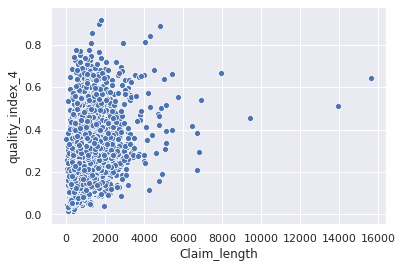

In [53]:
sns.scatterplot(x = 'Claim_length', y = 'quality_index_4', data = df_test)

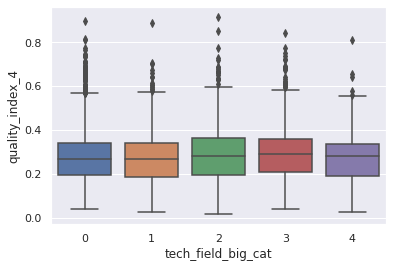

In [54]:
sns.boxplot(x='tech_field_big_cat', y ='quality_index_4',data = df_test)

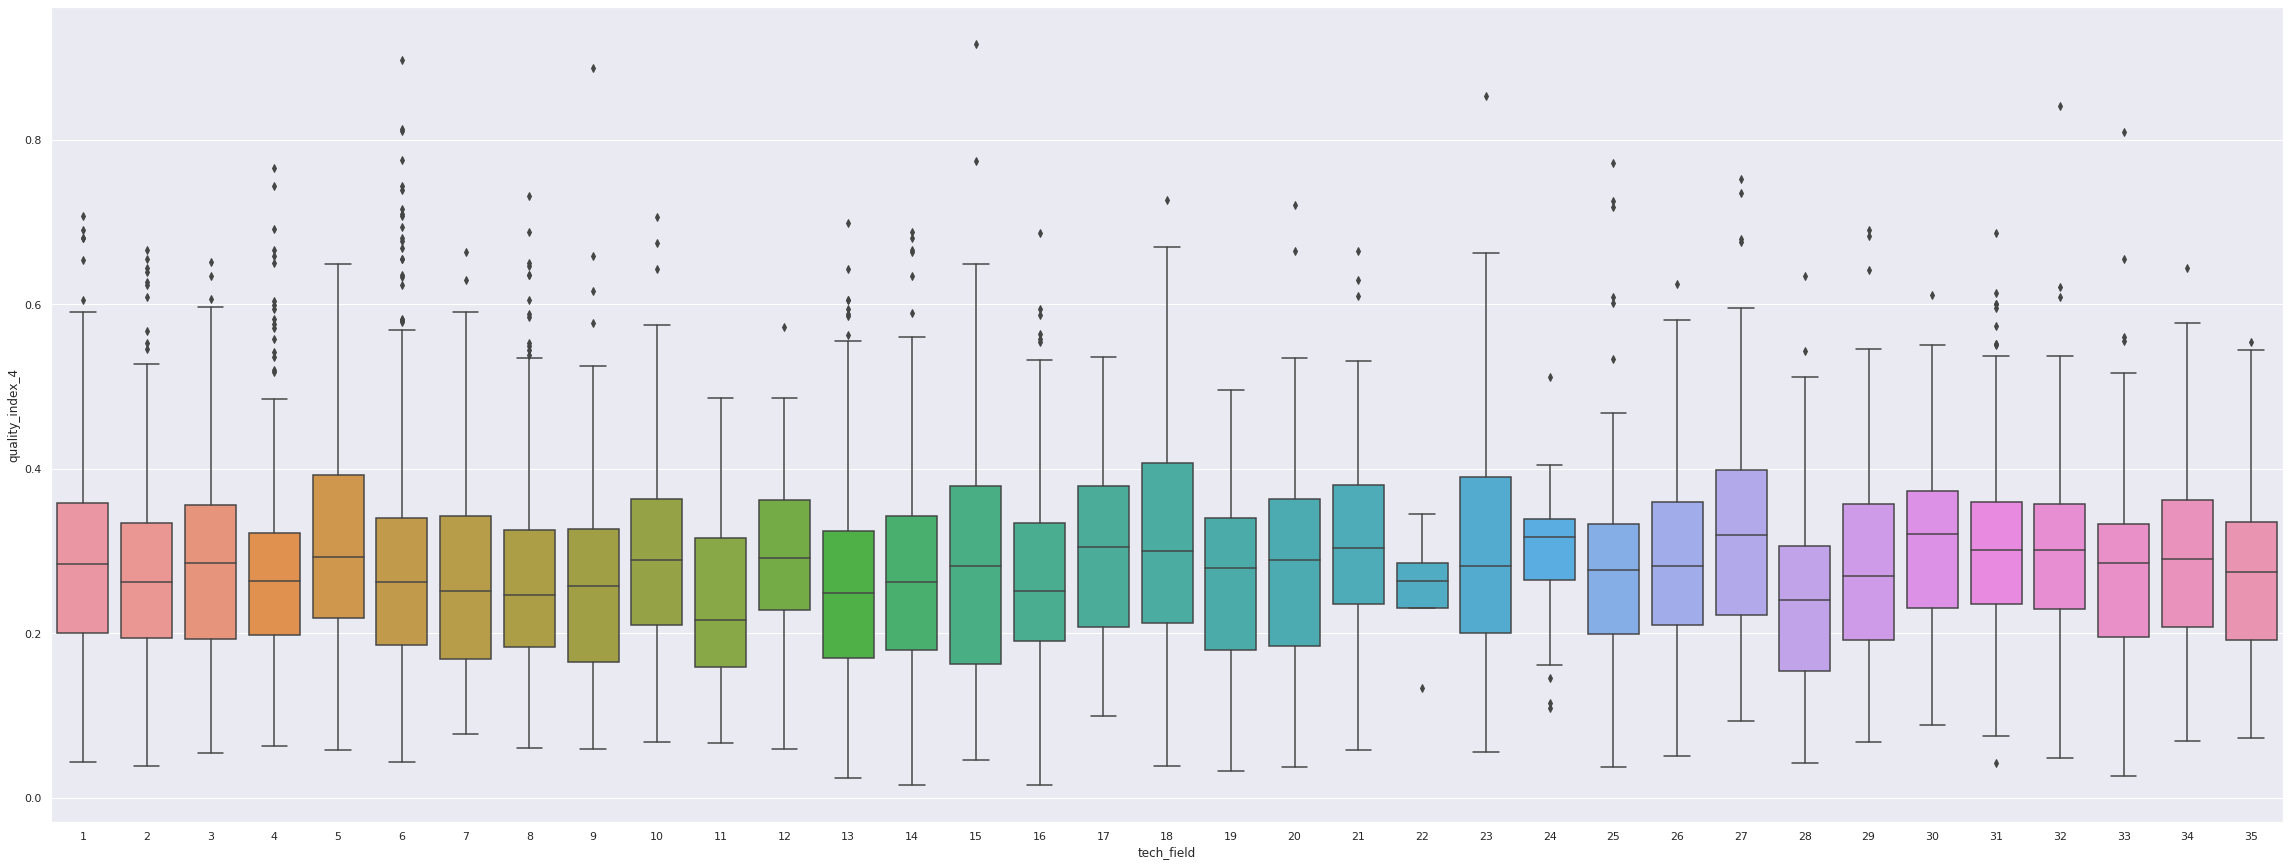

In [58]:
plt.figure(figsize=(40, 15))

sns.boxplot(x='tech_field', y ='quality_index_4',data = df_test)

In [ ]:
# also, what is making TF-IDF improve the precision?